<a href="https://colab.research.google.com/github/XianPearl/PlantDiseaseIdentification/blob/main/PlantIdentify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2
!pip install pydoc
import pydoc
help(zipfile.ZipFile)

ERROR: Could not find a version that satisfies the requirement pydoc (from versions: none)
ERROR: No matching distribution found for pydoc
Help on class ZipFile in module zipfile:

class ZipFile(builtins.object)
 |  ZipFile(file, mode='r', compression=0, allowZip64=True, compresslevel=None, *, strict_timestamps=True)
 |  
 |  Class with methods to open, read, write, close, list zip files.
 |  
 |  z = ZipFile(file, mode="r", compression=ZIP_STORED, allowZip64=True,
 |              compresslevel=None)
 |  
 |  file: Either the path to the file, or a file-like object.
 |        If it is a path, the file will be opened and closed by ZipFile.
 |  mode: The mode can be either read 'r', write 'w', exclusive create 'x',
 |        or append 'a'.
 |  compression: ZIP_STORED (no compression), ZIP_DEFLATED (requires zlib),
 |               ZIP_BZIP2 (requires bz2) or ZIP_LZMA (requires lzma).
 |  allowZip64: if True ZipFile will create files with ZIP64 extensions when
 |              needed, othe

Accuracy: 1.0


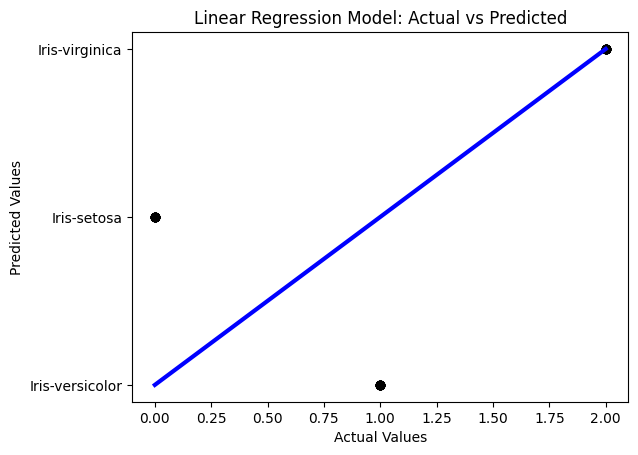

In [ ]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def pad_or_truncate(row, max_length):
    """
    Pad or truncate the given row to match the specified length.
    """
    if len(row) < max_length:
        # Pad the row with zeros to match the max_length
        return row + [0] * (max_length - len(row))
    elif len(row) > max_length:
        # Truncate the row to match the max_length
        return row[:max_length]
    else:
        return row

filename = 'iris.data'

# Read the dataset from the CSV file
with open(filename, 'rt') as raw_data:
    reader = csv.reader(raw_data, delimiter=',')
    data = list(reader)

# Determine the maximum number of columns in any row
max_columns = max(len(row) for row in data)

# Pad or truncate each row to ensure uniformity in the number of columns
data_padded = [pad_or_truncate(row, max_columns) for row in data]

# Convert the padded data into a numpy array and separate features (X) and labels (y)
data_array = np.array(data_padded)
X = data_array[:, :-1].astype(float)  # Features (all columns except the last one)
y = data_array[:, -1]  # Labels (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = SVC(kernel='linear')

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizing the data
import matplotlib.pyplot as plt

# Create a dictionary to map strings to integers
label_to_index = {label: i for i, label in enumerate(np.unique(y_test))}

# Convert strings to integers
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Plot the actual vs predicted values
plt.scatter(y_test_numeric, y_pred, color='black')
plt.plot([np.min(y_test_numeric), np.max(y_test_numeric)], [np.min(y_test_numeric), np.max(y_test_numeric)], color='blue', linewidth=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.show()

In [ ]:
import PyPDF2
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def read_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        # Create a PDF file reader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Iterate through each page of the PDF
        for page_num in range(len(pdf_reader.pages)):
            # Extract text from the current page
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

# Path to the directory containing PDF files
file_path = 'frontiers.pdf'

# Read the PDF file
text = read_pdf(file_path)

# In this example, we're not using any labels, so we'll set label as None
label = None

# Convert text data into a list to match the format used in the original code
text_data = [text]

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# Check if there are sufficient samples for splitting
if X.shape[0] > 1:
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, [label], test_size=0.3, random_state=42)

    # Initialize and train a classifier (e.g., Multinomial Naive Bayes)
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Insufficient samples for splitting the dataset.")

Insufficient samples for splitting the dataset.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Step 1: Load images and preprocess them

# Path to the folder containing images
data_folder = 'kaggle'

# List to store image data and corresponding labels
X = []
y = []

# Iterate through the images in the folder
for class_folder in os.listdir(data_folder):
    class_label = class_folder  # Assuming each subfolder name represents a class label
    for image_file in os.listdir(os.path.join(data_folder, class_folder)):
        # Load the image and preprocess it
        image_path = os.path.join(data_folder, class_folder, image_file)
        image = load_img(image_path, target_size=(224, 224))  # Resize image to desired dimensions
        image_array = img_to_array(image) / 255.0  # Convert image to array and normalize pixel values
        X.append(image_array)
        y.append(class_label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and compile a model

# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


FileNotFoundError: [Errno 2] No such file or directory: 'kaggle'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_kaggle = zipfile.ZipFile('/content/drive/MyDrive/kaggle.zip', 'r')
zip_kaggle.extractall('/kaggle')
zip_kaggle.close()

**NEW WAY**

In [ ]:
import os
import zipfile

zip_kaggle = zipfile.ZipFile('/content/drive/MyDrive/kaggle.zip', 'r')
zip_kaggle.extractall('/k_images')
zip_kaggle.close()

# Specify the root directory where you want to start the search
rootdir = '/k_images'

# Initialize an empty list to store the paths of .jpg files
jpg_files = []

# Walk through the directory tree
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.lower().endswith('.jpg'):
            # Append the absolute path of the .jpg file to the list
            jpg_files.append(os.path.join(subdir, file))

# Now 'jpg_files' contains the paths of all .jpg files in the nested folders
print("Found {} .jpg files:".format(len(jpg_files)))
for jpg_file in jpg_files:
    print(jpg_file)


Streaming output truncated to the last 5000 lines.
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 1707_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 2482_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 2521_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 2333_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 2046_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_/RS_Rust 2569_flipLR.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/44de5100-871f-495d-b4c6-70ab89059a68___RS_Late.B 7043.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/8b08d651-0fcc-43da-8aec-34389f834d63___GHLB2 Leaf 8644.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/ace982f8-596c-48e2-8c95-4292a5cbdae8___GHLB2 Leaf 8721.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/c0b62c7a-4b0c-43d6-80d9-d5c6eef43325___RS_Late.B 6114.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/8dbcc7c8-5845-43e4-867f-b9f7da8a53c3___GHLB2 Leaf 8786.JPG
/k_images/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/695000c6-5857-45af-a8cb-470bfeedf274___R.S_HL 7970 copy.jpg
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/03fc887f-e206-4233-8829-ff7070bb3449___R.S_HL 5519 copy 2_flipLR.jpg
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/fec7d3b4-736b-4d95-92cb-2e8b302f7488___R.S_HL 8306 copy.jpg
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/f924ef4a-eb10-4bc8-9a3d-24a2a3090798___R.S_HL 8336 copy 3_flipLR.jpg
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy/4e65846a-3154-486c-b58c-cbaf698e0f97___R.S_HL 8151 copy 2.jpg
/k_images/New Plant Diseases Dataset(Augmented)/New Pl

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/7ba80ce1-562a-404b-a8e9-273cd917081a___FREC_C.Rust 9833.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/24f68f21-8edb-49df-b0f1-d75ac66631fd___FREC_C.Rust 9937.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/b2723e0b-7e61-48ae-b50e-0cee5d437cb3___FREC_C.Rust 3823_180deg.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/90bff1e0-f71d-4963-93cb-8a9a16f49e74___FREC_C.Rust 9939_180deg.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/097f37e1-d490-42e6-84d2-51e5385bf886___FREC_C.Rust 9861_newGRR.JPG
/k_images/New Plant Diseases Dataset(Augmen

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/242bf7e3-c469-4372-8959-8011e3fe0d7e___FAM_L.Blight 5003_flipLR.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/228b57e4-cd3f-4b41-a7ff-7d85c9dde7f9___FAM_L.Blight 4869.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/914468c9-33f4-4da4-8eb2-23ab4225c3f5___FAM_L.Blight 4973.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/9332c3fa-9f55-42bf-a3cf-35f336e58ecb___FAM_L.Blight 1564_flipLR.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/9b25990f-0833-4e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/b4ab9ee4-136d-4150-b01c-1d885669da4a___JR_HL 4312_flipTB.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/f7ba57f4-27d2-4aea-bffc-60175812e5b9___JR_HL 9832_flipTB.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/b4ac3179-6fd4-4b2a-bf8c-479de4348ff4___JR_HL 9535_flipTB.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/263640d8-3279-4568-998c-e98f6e991b44___JR_HL 9865_180deg.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy/58ee2770-35f5-42e8-95b4-123896328f1b___JR_HL 9684_flipTB.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseas

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/763335af-2beb-4331-b2e5-3f61a4b0b914___PSU_CG 2365_new30degFlipLR.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/526552ed-aa23-41e6-a79f-05f8fca5162d___PSU_CG 2090.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/2bd56a9c-3dec-41f7-ab7a-403670ea0462___PSU_CG 2346_new30degFlipLR.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/a72414b0-f520-4044-abeb-cd09c28b4a9f___PSU_CG 2267.JPG
/k_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/b8972ee2-b576-4fdd-bb69-f8c43b87471b___PSU_CG 2060.JPG
/k_images/New Plant Diseases Dataset(Au

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define parameters for image resizing
img_height = 180
img_width = 180


# Load and preprocess each image
def img_generator():
  for jpg_path in jpg_files:
      # Load the image
      img = load_img(jpg_path, target_size=(img_height, img_width))
      # Convert the image to a NumPy array
      img_array = img_to_array(img)
      # Normalize pixel values to [0, 1]
      img_array /= 255.0
      yield img_array

preprocessed_images = img_generator()


In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Define the batch size (adjust as needed)
batch_size = 100

# Initialize an empty list to store processed batches
processed_batches = []

# Process images in batches
current_batch = []
for img_array in preprocessed_images:
    current_batch.append(img_array)
    if len(current_batch) == batch_size:
        # Reshape the current batch to have only two dimensions
        X_train = np.array(current_batch).reshape(len(current_batch), -1)

        # Example: Train a logistic regression model
        model = OneClassSVM()
        model.fit(X_train)

        # Calculate precision and recall scores
        precision = precision_score(y_true, model.predict(X_train))
        recall = recall_score(y_true, model.predict(X_train))

        print(f"Precision on test set: {precision:.2f}")
        print(f"Recall on test set: {recall:.2f}")

        # Append the processed batch to the list
        processed_batches.append(current_batch)
        current_batch = []

# Process any remaining images (if the total count is not a multiple of batch_size)
if current_batch:
    X_train = np.array(current_batch).reshape(len(current_batch), -1)

    # Example: Train a logistic regression model
    model = OneClassSVM()
    model.fit(X_train)
    # Calculate precision and recall scores
    precision = precision_score(y_true, model.predict(X_train))
    recall = recall_score(y_true, model.predict(X_train))
    print(f"Precision on test set: {precision:.2f}")
    print(f"Recall on test set: {recall:.2f}")
    processed_batches.append(current_batch)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

**OLD WAY**

In [ ]:
import zipfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Step 1: Upload the Zip File (Already uploaded in Colab)

# Specify the path to the zip file
zip_file_path = "/content/drive/MyDrive/kaggle.zip"

# Specify the destination folder where the images will be extracted
destination_folder = "k_images"

# Extract the images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_file_contents = zip_ref.namelist()
    for file_name in zip_file_contents:
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg"):
            full_file_path = os.path.join(destination_folder, file_name)
            os.makedirs(os.path.dirname(full_file_path), exist_ok=True)
            zip_ref.extract(file_name, destination_folder)

print(zip_ref)

# Step 3: Load and Preprocess Images
image_folder = destination_folder
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if not os.path.isdir(os.path.join(image_folder, filename))]
images = []
labels = []

for path in image_paths:
    # Assuming image labels are encoded in the filename or directory structure
    label = os.path.basename(os.path.dirname(path))
    labels.append(label)

    # Load and preprocess the image
    img = Image.open(path)
    img = img.resize((224, 224))  # Resize if necessary
    img_array = np.array(img) / 255.0  # Normalize pixel values
    images.append(img_array)

images = np.array(images)
labels = np.array(labels)

print(f"Number of image paths: {len(image_paths)}")
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")
print(f"Number of samples: {len(images)}")
#print(f"Test size: {test_size}")

# Step 4: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 5: Model Training (Example: using a simple classifier)
from sklearn.svm import SVC

model = SVC()
model.fit(X_train.reshape(len(X_train), -1), y_train)

# Step 6: Model Testing
accuracy = model.score(X_test.reshape(len(X_test), -1), y_test)
print("Accuracy:", accuracy)


Number of image paths: 0
Number of images: 0
Number of labels: 0
Number of samples: 0


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

**IMPORT DEPENDENCIES**

**IMPORT DATASETS**

In [ ]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)

In [ ]:
dataset = datasets.ImageFolder("Dataset", transform=transform)